In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
import scipy


Dataset link : https://www.kaggle.com/datasets/qusaybtoush1990/machine-learning?resource=download


In [123]:
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve,ConfusionMatrixDisplay


In [124]:
seed = 42

In [125]:
df = pd.read_csv("lending_club_loan_dataset.csv")

In [126]:
df.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [127]:
df['term'] = df['term'].str.lower()
df['term'].value_counts()
#Correcting the error of showing 36 Months in some ways, so we convert all the values in the column to lowercase.

#Here we can see that the majority of the people (75%) request a 3 year loan, whereas the rest 25% request 60 month

 36 months    15001
 60 months     4999
Name: term, dtype: int64

In [128]:
df.isnull().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

In [129]:
df.corr()

<ipython-input-129-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
id,1.000000,0.017971,0.015413,0.003863,0.006407,-0.034091,-0.051439,-0.006106,-0.014203,0.000465,-0.037307
annual_inc,0.017971,1.000000,-0.099317,0.118024,-0.230219,-0.080378,0.023281,0.016951,0.014713,-0.004953,-0.092402
short_emp,0.015413,-0.099317,1.000000,-0.582580,0.002013,0.030880,0.072290,-0.011014,0.010424,-0.005309,0.037186
emp_length_num,0.003863,0.118024,-0.582580,1.000000,0.009369,-0.053371,-0.158177,0.027390,-0.012382,0.004446,-0.041420
dti,0.006407,-0.230219,0.002013,0.009369,1.000000,0.030379,0.004079,0.098673,0.011072,0.005571,0.141884
last_delinq_none,-0.034091,-0.080378,0.030880,-0.053371,0.030379,1.000000,0.603267,0.013373,-0.011000,-0.001996,0.021494
last_major_derog_none,-0.051439,0.023281,0.072290,-0.158177,0.004079,0.603267,1.000000,-0.027597,-0.086395,0.050211,-0.013770
revol_util,-0.006106,0.016951,-0.011014,0.027390,0.098673,0.013373,-0.027597,1.000000,0.008435,-0.008228,0.053682
total_rec_late_fee,-0.014203,0.014713,0.010424,-0.012382,0.011072,-0.011000,-0.086395,0.008435,1.000000,-0.002354,0.130233
od_ratio,0.000465,-0.004953,-0.005309,0.004446,0.005571,-0.001996,0.050211,-0.008228,-0.002354,1.000000,0.000403


In [130]:
#Categorical variables - 
#purpose
#home_ownership
#term
#grade


In [131]:
#We will now analyse all the categorial variables and see their behaviour

In [132]:
df['purpose'].value_counts()
#the most common purpose of taking a loan, by far, is debt consolidation

debt_consolidation    12337
credit_card            4137
home_improvement       1096
other                  1021
major_purchase          379
small_business          265
medical                 175
car                     168
moving                  123
vacation                112
house                   101
wedding                  86
Name: purpose, dtype: int64

<Axes: >

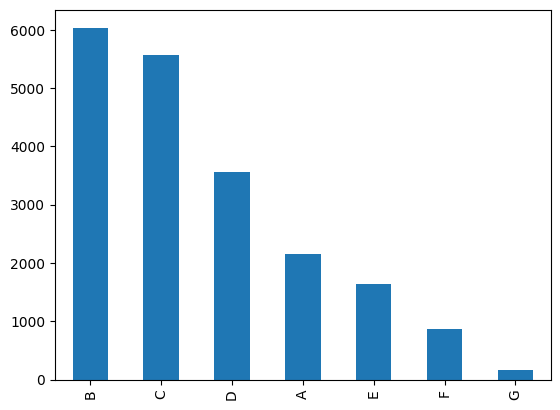

In [133]:
#Analysing the grade column
df['grade'].value_counts().plot(kind='bar')
#We can see that most of the grades are either B or C
#Slightly over 2000 loans have received the grade of A
#So we can say that most of the loans are average, whereas really good or really bad loans are rare

<Axes: >

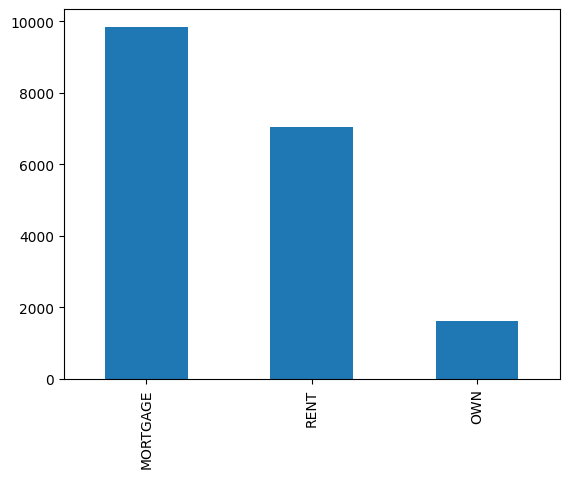

In [134]:
#Analysing the home_ownership column
df['home_ownership'].value_counts().plot(kind='bar')
#We can see that most of the people have their houses on mortgage, and many others on rent. A small percentage of people applying
#for loans own their house

<Axes: >

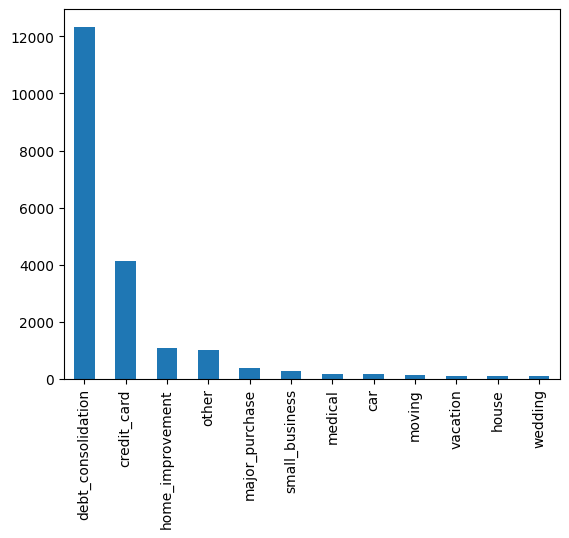

In [135]:
#Analysing the purpose of loan
df['purpose'].value_counts().plot(kind='bar')

#We can see that most of the people want a loan to consolidate their debt, which explains a bit of why Americans are caught in
#a debt cycle, using a loan to clear another debt. The second most reason is credit card, which accentuates this further

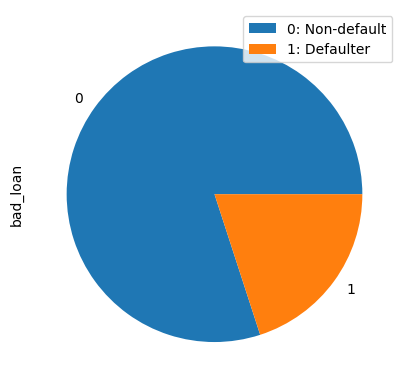

In [136]:
df['bad_loan'].value_counts().plot(kind='pie')
plt.legend(["0: Non-default","1: Defaulter"])

#Most of the applications, about 80%, have paid loans. The default rate is about 20%
#So we know that we have an unbalanced dataset

In [137]:
#Below we can see the distributions for each variable

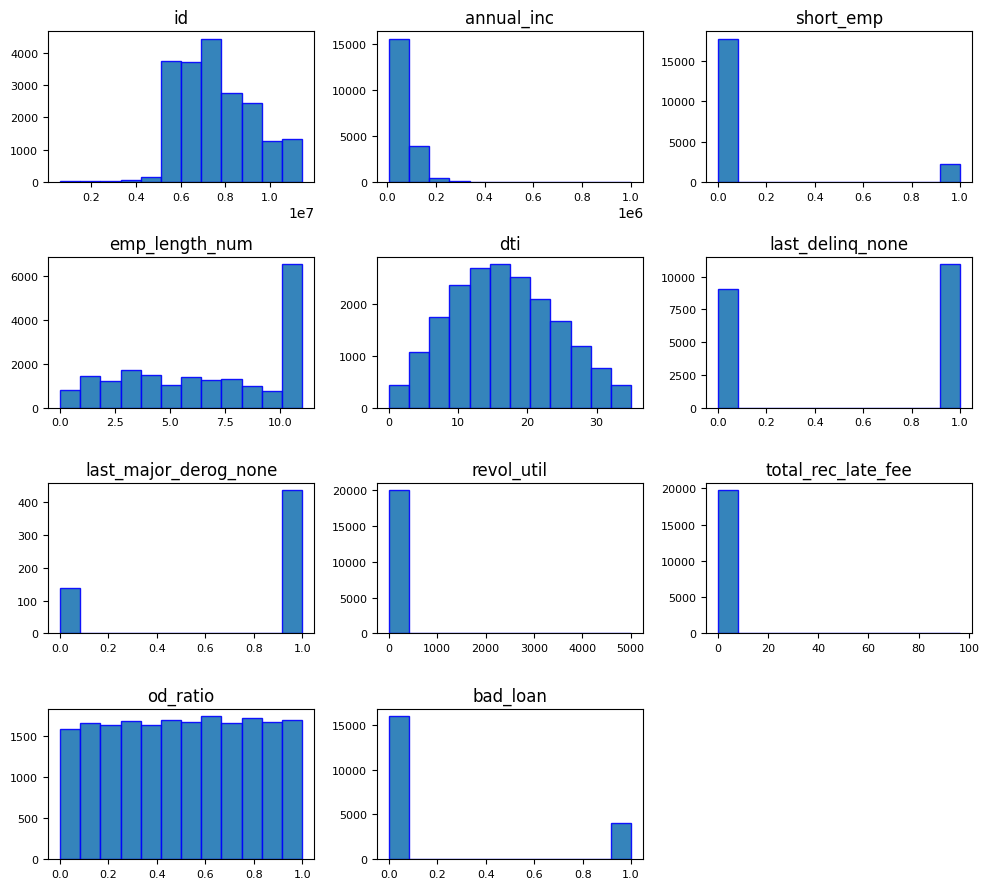

In [138]:
df.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

<ipython-input-139-2cc42337d5e3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG')


[]

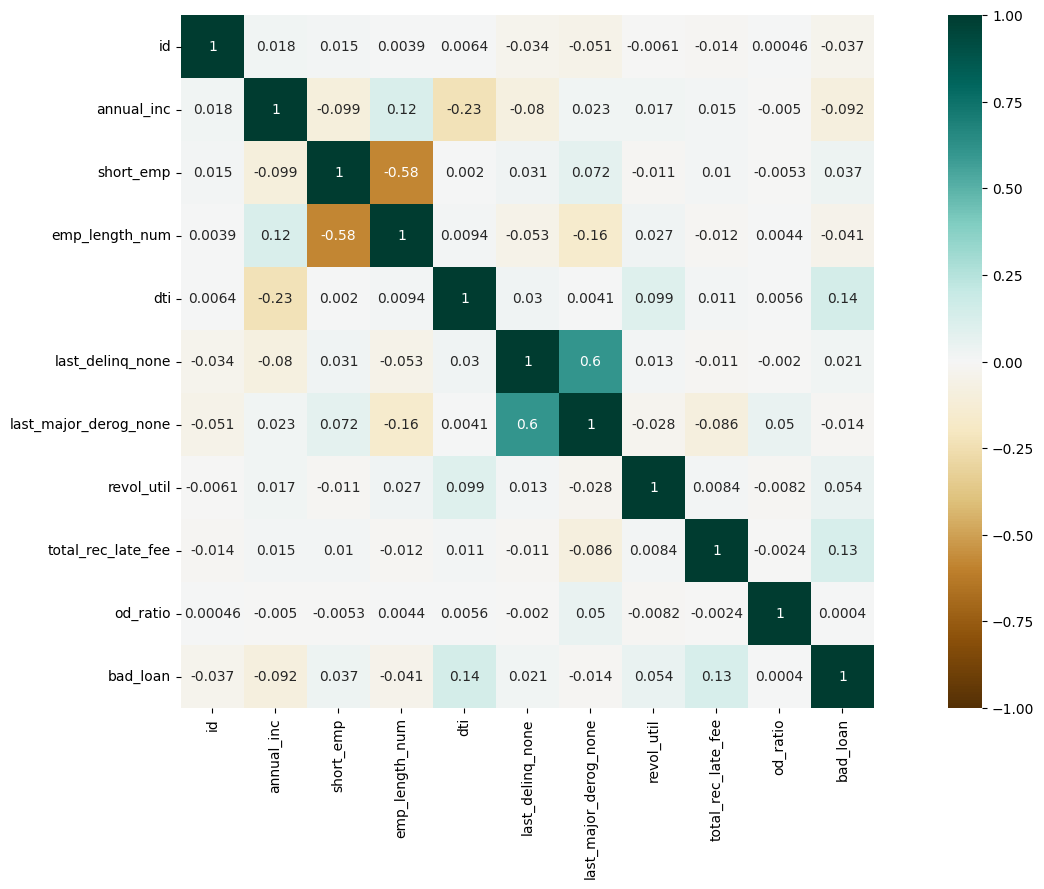

In [139]:
#Variables heatmap
plt.figure(figsize=(19, 9))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG')
plt.plot()
#From the heatmap, we can see that no variables have any significant correlation to the target variable bad_loan
#The highest correlated vairables are last_major_derog_none and last_delinq_none.
#But due to the high number of null values in the last_major_derog_none column, we will dorp it entirely.

In [140]:
#Selecting only the numerical variables for boxplots
df_num = df.select_dtypes(exclude=["object","category"]).copy()

In [141]:
df.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [142]:
df_numeric = df.drop(['purpose','home_ownership','term','grade'],axis=1)
df_numeric.drop(['id'],axis=1)

,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,100000.0,1,1,26.27,1,NaN,43.2,0.0,0.160624,0
1,83000.0,0,4,5.39,0,NaN,21.5,0.0,0.810777,0
2,78000.0,0,11,18.45,1,NaN,46.3,0.0,0.035147,1
3,37536.0,0,6,12.28,0,NaN,10.7,0.0,0.534887,1
4,65000.0,0,11,11.26,0,NaN,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...
19995,27000.0,0,9,18.36,1,NaN,46.5,0.0,0.821782,1
19996,45000.0,0,2,23.22,0,NaN,46.2,0.0,0.652200,0
19997,104000.0,0,5,13.27,1,NaN,78.5,0.0,0.482555,0
19998,38400.0,0,2,12.84,0,NaN,47.4,0.0,0.822980,0


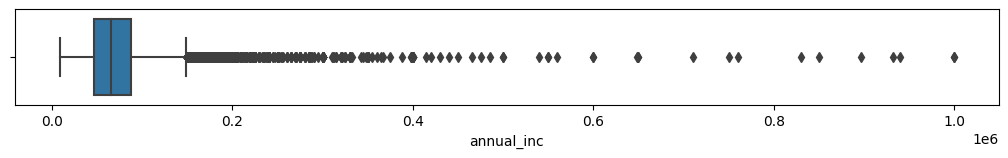

In [143]:
fig, ax = plt.subplots(figsize=(10,1.5))
sns.boxplot(x=df['annual_inc'],orient='h')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [144]:
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

df['annual_inc'] = df.annual_inc[~((df.annual_inc < (Q1 - 1.5 * IQR)) |(df.annual_inc > (Q3 + 1.5 * IQR)))]

In [145]:
df['annual_inc'].describe()
#So the count ahs reduced from 20000 to 19074, meaning that 926 outliers were detected and removed

count     19074.000000
mean      66792.117857
std       27241.646991
min        8412.000000
25%       46000.000000
50%       62000.000000
75%       84000.000000
max      149000.000000
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc'>

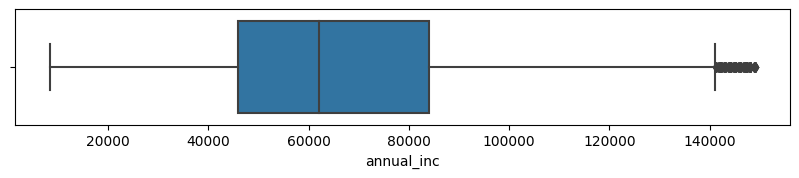

In [146]:
#Here is the boxplot for the new annual_inc column after outlier removal
fig, ax = plt.subplots(figsize=(10,1.5))
sns.boxplot(x=df['annual_inc'],orient='h')


<Axes: xlabel='revol_util'>

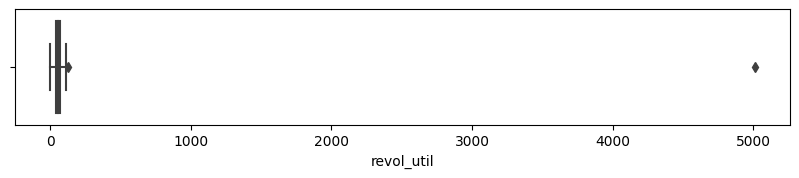

In [147]:
fig, ax = plt.subplots(figsize=(10,1.5))
sns.boxplot(x=df['revol_util'],orient='h')
#We see a singular outlier

In [148]:
#Removing the singular outlier
value = df.revol_util.quantile([.99999])
p = value.iloc[0]
df = df[df["revol_util"] < p]

In [149]:
df['revol_util'].describe()
#One outlier has been removed

count    19999.000000
mean        55.710434
std         23.380722
min          0.000000
25%         38.800000
50%         57.100000
75%         73.900000
max        128.100000
Name: revol_util, dtype: float64

<Axes: xlabel='total_rec_late_fee'>

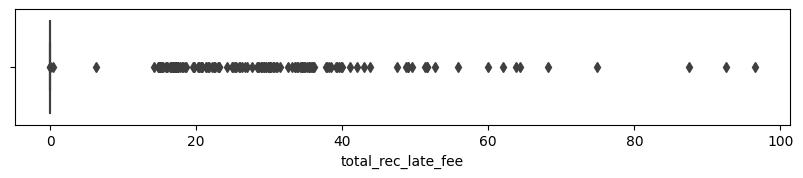

In [150]:
fig, ax = plt.subplots(figsize=(10,1.5))
sns.boxplot(x=df['total_rec_late_fee'],orient='h')
#We detect a lot of outliers

In [151]:
value = df.total_rec_late_fee.quantile([.989])
p = value.iloc[0]
df = df[df["total_rec_late_fee"] < p]

In [152]:
#After removing the outliers
df['total_rec_late_fee'].describe()

#221 outliers have been removed

count    19779.000000
mean         0.005581
std          0.282328
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.968500
Name: total_rec_late_fee, dtype: float64

<Axes: xlabel='total_rec_late_fee'>

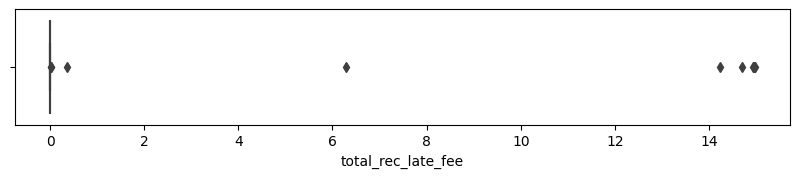

In [153]:
fig, ax = plt.subplots(figsize=(10,1.5))
sns.boxplot(x=df['total_rec_late_fee'],orient='h')

In [154]:
# To detect Missing values:

for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ---> '{portion:.3f}%'")
        

'annual_inc': number of missing values '915' ---> '4.626%'
'home_ownership': number of missing values '1476' ---> '7.462%'
'dti': number of missing values '152' ---> '0.768%'
'last_major_derog_none': number of missing values '19208' ---> '97.113%'


In [155]:
#1 'annual_inc'
df.annual_inc.value_counts(dropna=False)


NaN         915
60000.0     771
50000.0     729
65000.0     607
70000.0     599
           ... 
49955.0       1
112711.0      1
66389.0       1
62212.0       1
36676.0       1
Name: annual_inc, Length: 2349, dtype: int64

In [156]:
#Replacing missing values with mean

df["annual_inc"] = df.annual_inc.fillna(df.annual_inc.mean())
print(f"Fillna done. Anomalies detected: {df.annual_inc.isnull().values.any()}")

Fillna done. Anomalies detected: False


In [157]:
#2 'home_ownership'
df.home_ownership.value_counts(dropna=False)



MORTGAGE    9744
RENT        6959
OWN         1600
NaN         1476
Name: home_ownership, dtype: int64

In [158]:
# Mode imputation (replacing NaN by most frequent value: Mortage)
df["home_ownership"] = df.home_ownership.fillna(df.home_ownership.value_counts().index[0])
print(f"Imputation done. Missing values: {df.home_ownership.isnull().sum()}")

Imputation done. Missing values: 0


In [159]:
#3 'dti'
df['dti'].value_counts(dropna=False)

NaN      152
15.87     20
19.64     20
19.25     19
11.45     19
        ... 
34.32      1
0.11       1
1.61       1
1.47       1
32.53      1
Name: dti, Length: 3286, dtype: int64

In [160]:
# Replacing missing values with the mean (average)
df["dti"] = df.dti.fillna(df.dti.mean())
print(f"Fillna done. Missing values: {df.dti.isnull().values.any()}")

Fillna done. Missing values: False


In [161]:
#4 'last_major_derog_none'

abs_mv = df.last_major_derog_none.value_counts(dropna=False)
pc_mv = df.last_major_derog_none.value_counts(dropna=False, normalize=True) * 100
pc_mv_df = pd.DataFrame(pc_mv)
pc_mv_df.rename(columns={"last_major_derog_none":"Percent %"}, inplace=True)
abs_pc = pd.concat([abs_mv,pc_mv_df], axis=1)
abs_pc

,last_major_derog_none,Percent %
NaN,19208,97.113100
1.0,435,2.199302
0.0,136,0.687598


In [162]:
# Drop ‘last_major_derog_none’ numerical variable as too many anomalies(97.11% Nan values)

df.drop("last_major_derog_none", axis=1, inplace=True)
print(f"All missing values are solved in the entire dataset: {df.notnull().values.any()}")

All missing values are solved in the entire dataset: True


In [163]:
df.isnull().sum()
#We can see that there there are no more null values in the dataframe

id                    0
grade                 0
annual_inc            0
short_emp             0
emp_length_num        0
home_ownership        0
dti                   0
purpose               0
term                  0
last_delinq_none      0
revol_util            0
total_rec_late_fee    0
od_ratio              0
bad_loan              0
dtype: int64

In [164]:
#Feature selection

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19779 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19779 non-null  int64  
 1   grade               19779 non-null  object 
 2   annual_inc          19779 non-null  float64
 3   short_emp           19779 non-null  int64  
 4   emp_length_num      19779 non-null  int64  
 5   home_ownership      19779 non-null  object 
 6   dti                 19779 non-null  float64
 7   purpose             19779 non-null  object 
 8   term                19779 non-null  object 
 9   last_delinq_none    19779 non-null  int64  
 10  revol_util          19779 non-null  float64
 11  total_rec_late_fee  19779 non-null  float64
 12  od_ratio            19779 non-null  float64
 13  bad_loan            19779 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.3+ MB


In [165]:
#Drop ‘id’ numerical variable as it an irrelevant feature
df.drop("id", axis=1, inplace=True)


In [166]:
#Numerical Feature selection
# Selecting numeric variables only:

df_numerical = df.select_dtypes(exclude=["object","category"]).copy()



In [167]:
#Creating Subsets

Xnum = df_numerical.drop(["bad_loan"], axis= "columns")
ynum = df_numerical.bad_loan



In [168]:
# Identifying the predictive features using the Pearson Correlation p-value
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], 
    ynum) for col in Xnum.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=Xnum.columns,).round(4)

,Pearson Corr.,p-value
annual_inc,-0.1227,0.0000
short_emp,0.0368,0.0000
emp_length_num,-0.0406,0.0000
dti,0.1394,0.0000
last_delinq_none,0.0216,0.0024
revol_util,0.1013,0.0000
total_rec_late_fee,0.0240,0.0007
od_ratio,0.0007,0.9214


In [169]:
# Drop ‘od_ratio’ (p-value > 0.05) which implies it is not significant. 
# We will keep the remaining variables as they are below 0.05 and hence significant
df.drop("od_ratio", axis=1, inplace=True)


In [170]:
# Categorical Features and Categorical/Binary Target
#Selecting categoric variables only:
cat = df.select_dtypes(exclude=['int64','float64']).copy()

In [171]:
# Creating subsets:

cat['target'] = df.bad_loan
cat.dropna(how="any", inplace=True)
ycat = cat.target
cat.drop("target", axis=1, inplace=True)


In [172]:
# We will use Chi-square test for independence for categorical variables:

for col in cat.columns:
    table = pd.crosstab(cat[col], ycat)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")

target,0,1
grade,,
A,2030,120
B,5257,736
C,4375,1127
D,2566,947
E,1099,516
F,509,333
G,102,62


p-value: 0.0000000000000000000000000



target,0,1
home_ownership,,
MORTGAGE,9298,1922
OWN,1293,307
RENT,5347,1612


p-value: 0.0000000000000000000001931



target,0,1
purpose,,
car,138,30
credit_card,3424,679
debt_consolidation,9824,2386
home_improvement,881,199
house,85,12
major_purchase,289,83
medical,135,37
moving,92,28
other,745,261


p-value: 0.0000000000000872350281927



target,0,1
term,,
36 months,12416,2437
60 months,3522,1404


p-value: 0.0000000000000000000000000


In [173]:
# Keep all features as p-value < 0.05

In [174]:
#Encoding and transformation: encoding and transforming the categorical variables into numeric ones.
df = pd.get_dummies(df, columns=["grade","term","home_ownership","purpose"])

In [175]:
df.head()

,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,bad_loan,grade_A,grade_B,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
0,100000.0,1,1,26.27,1,43.2,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,83000.0,0,4,5.39,0,21.5,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,78000.0,0,11,18.45,1,46.3,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,37536.0,0,6,12.28,0,10.7,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,65000.0,0,11,11.26,0,15.2,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [176]:
# ROC Curve: Area Under the Curve

def auc_roc_plot(y_test, y_preds):
    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [177]:
df.to_csv("Encoded and cleaned data.csv")

In [ ]:
#MODEL 1: LOGISTIC REGRESSION

#train test split 

train_set_lr, test_set_lr = train_test_split(df, test_size = 0.2, random_state = seed)
X_train_lr = train_set_lr.drop(['bad_loan'], axis = 1)
y_train_lr = train_set_lr['bad_loan']
X_test_lr = test_set_lr.drop(['bad_loan'], axis = 1)
y_test_lr = test_set_lr['bad_loan']

In [ ]:
#Normalizing the train and test data using min max scaler

scaler_lr = MinMaxScaler()
features_names = X_train_lr.columns
X_train_lr = scaler_lr.fit_transform(X_train_lr)
X_train_lr = pd.DataFrame(X_train_lr, columns = features_names)
X_test_lr = scaler_lr.transform(X_test_lr)
X_test_lr = pd.DataFrame(X_test_lr, columns = features_names)

In [ ]:
lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train_lr, y_train_lr)

In [ ]:
clf_lr

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
clf_lr.best_estimator_

LogisticRegression(C=100, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [ ]:
y_preds_lr = clf_lr.predict_proba(X_test_lr)[:,1]

In [ ]:
y_preds_lr

array([0.34267914, 0.48113997, 0.27637204, ..., 0.57534744, 0.6476199 ,
       0.24710208])

In [ ]:
y_preds_discrete=[1 if x>0.5 else 0 for x in y_preds_lr]

The precision is: 0.3054101221640489
0.6637866500311915


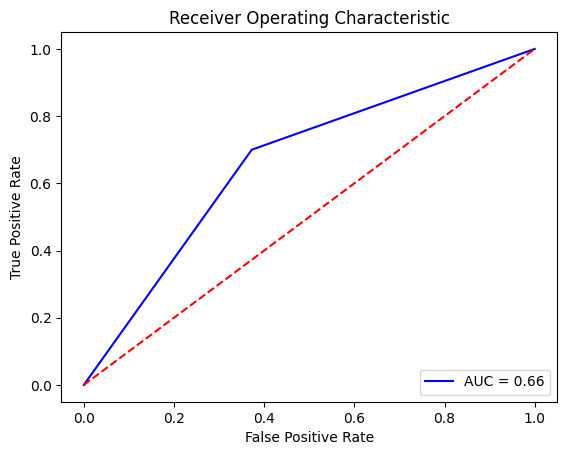

In [ ]:
#ROC curve
from sklearn.metrics import precision_score
fpr, tpr, thresholds = roc_curve(y_test_lr,y_preds_discrete)
print("The precision is:",precision_score(y_test_lr,y_preds_discrete,average='binary'))
auc_roc_plot(y_test_lr, y_preds_discrete)

Precision is: 0.3054101221640489
Recall is: 0.7
F1 score is: 0.42527339003645204


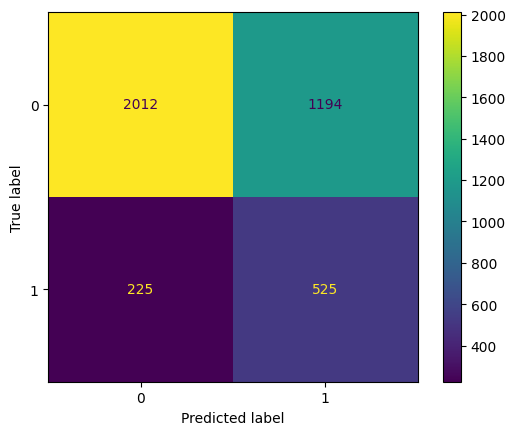

In [ ]:
# Confusion Matrix display
cm = confusion_matrix(y_test_lr, y_preds_discrete, labels=clf_lr.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=clf_lr.classes_).plot()

# Creating assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_lr == 1, y_preds_lr > 0.5).ravel()
tn_lr = tn
fp_lr = fp
fn_lr = fn
tp_lr = tp

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Precision is:",tp/(tp+fp))
print("Recall is:",tp/(tp+fn))
print("F1 score is:",(2*precision*recall)/(precision+recall))

In [ ]:
# MODEL 2: KNN

df_knn = df

# Train test split
train_set_knn, test_set_knn = train_test_split(df_knn, test_size = 0.2, random_state = seed)
X_train_knn = train_set_knn.drop(['bad_loan'], axis = 1)
y_train_knn = train_set_knn['bad_loan']
X_test_knn = test_set_knn.drop(['bad_loan'], axis = 1)
y_test_knn = test_set_knn['bad_loan']

In [ ]:
# Normalizing train and test data using min max scaler

scaler_knn = MinMaxScaler()
features_names = X_train_knn.columns
X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_train_knn = pd.DataFrame(X_train_knn, columns = features_names)
X_test_knn = scaler_knn.transform(X_test_knn)
X_test_knn = pd.DataFrame(X_test_knn, columns = features_names)

In [ ]:
for k in range(1, 50, 5):
    k = k + 1
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn, y_train_knn)
    acc = knn.score(X_test_knn, y_test_knn)
    print('Accuracy for k =', k, ' is:', acc)

Accuracy for k = 2  is: 0.788675429726997
Accuracy for k = 7  is: 0.7917087967644085
Accuracy for k = 12  is: 0.8061172901921132
Accuracy for k = 17  is: 0.80788675429727
Accuracy for k = 22  is: 0.8116784630940344
Accuracy for k = 27  is: 0.8071284125379171
Accuracy for k = 32  is: 0.8091506572295247
Accuracy for k = 37  is: 0.8086450960566228
Accuracy for k = 42  is: 0.8104145601617796
Accuracy for k = 47  is: 0.8101617795753286


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 27, weights='uniform').fit(X_train_knn, y_train_knn)
y_preds_knn = knn.predict(X_test_knn)


Precision is: 0.39344262295081966
Recall is: 0.032
F1 score is: 0.05918618988902589


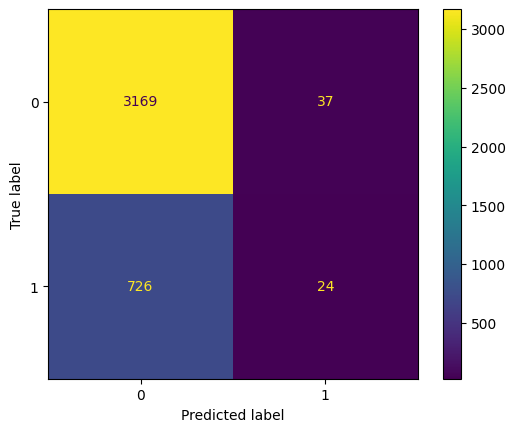

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_knn == 1, y_preds_knn > 0.5).ravel()
tn_knn = tn
fp_knn = fp
fn_knn = fn
tp_knn = tp

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Precision is:",tp/(tp+fp))
print("Recall is:",tp/(tp+fn))
print("F1 score is:",(2*precision*recall)/(precision+recall))


cm = confusion_matrix(y_test_knn, y_preds_knn, labels=knn.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=knn.classes_).plot()

0.5102295695570805


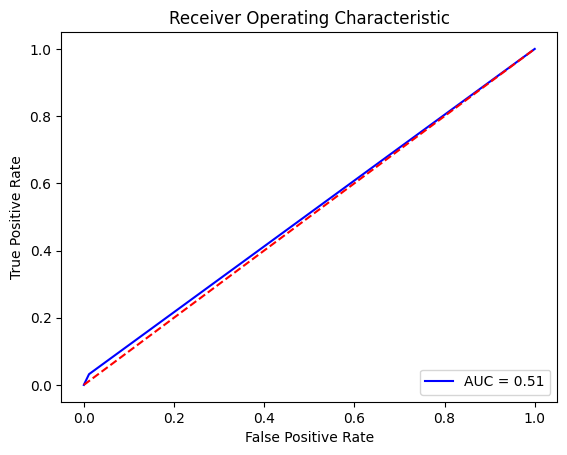

In [ ]:
#Plotting ROC curve 

auc_roc_plot(y_test_knn, y_preds_knn)


In [214]:
#MODEL 3: Gradient Boosted Decision Tree

#Train test split
train_set_gbdt, test_set_gbdt = train_test_split(df, test_size = 0.2, random_state = seed)
X_train_gbdt = train_set_gbdt.drop(['bad_loan'], axis = 1)
y_train_gbdt = train_set_gbdt['bad_loan']
X_test_gbdt = test_set_gbdt.drop(['bad_loan'], axis = 1)
y_test_gbdt = test_set_gbdt['bad_loan']
from sklearn.ensemble import GradientBoostingClassifier

In [215]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],

}

GBC = GradientBoostingClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=5,scoring="roc_auc")

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_gbdt, y_train_gbdt)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'n_estimators': 50}
Best score:  0.6900536410627522


0.5317242669993761


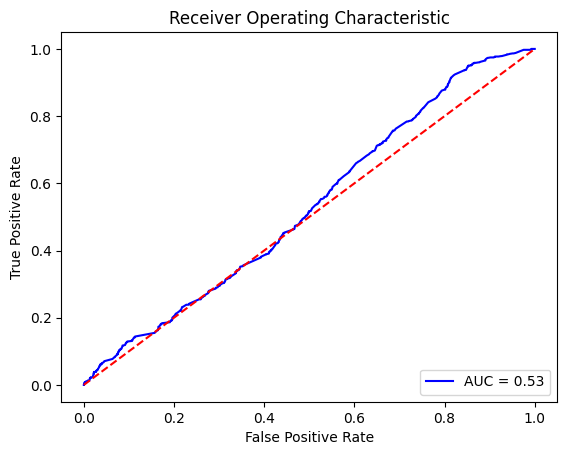

In [225]:
# Get the best estimator from GridSearchCV
best_gbc = grid_search.best_estimator_

# Make predictions on the test data
y_preds_gb = best_gbc.predict_proba(X_test_lr)[:,1]

y_preds_discrete=[1 if x>0.5 else 0 for x in y_preds_gb]

auc_roc_plot(y_test_gbdt, y_preds_gb)


Precision is: 0.18406423718344658
Recall is: 0.3973333333333333
F1 score is: 0.25158294639088224


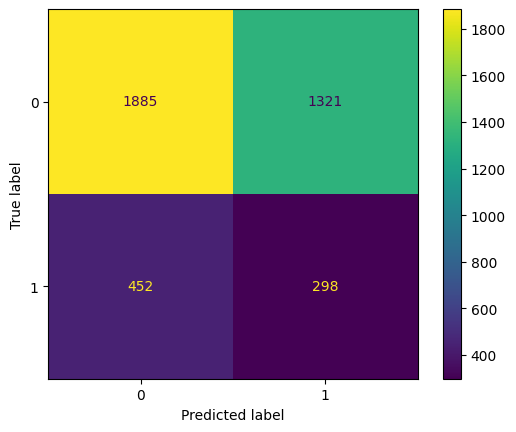

In [223]:
# Confusion Matrix display
cm = confusion_matrix(y_test_gbdt, y_preds_discrete, labels=knn.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=knn.classes_).plot()

# Creating assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_gbdt == 1, y_preds_gb > 0.5).ravel()
tn_svc = tn
fp_svc = fp
fn_svc = fn
tp_svc = tp

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Precision is:",tp/(tp+fp))
print("Recall is:",tp/(tp+fn))
print("F1 score is:",(2*precision*recall)/(precision+recall))

In [226]:
#MODEL 4: Random Forest Classifier
df_rf= df
from sklearn.ensemble import RandomForestClassifier
#Train test split
train_set_rf, test_set_rf = train_test_split(df_rf, test_size = 0.2, random_state = seed)
X_train_rf = train_set_rf.drop(['bad_loan'], axis = 1)
y_train_rf = train_set_rf['bad_loan']
X_test_rf = test_set_rf.drop(['bad_loan'], axis = 1)
y_test_rf = test_set_rf['bad_loan']

In [227]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],

}

rfc = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5,scoring="roc_auc")

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_rf, y_train_rf)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'n_estimators': 100}
Best score:  0.6939882232446456


In [228]:
# Get the best estimator from GridSearchCV
best_rfc = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_rfc.predict(X_test_rf)

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred)

In [229]:
y_preds_discrete=[1 if x>0.5 else 0 for x in y_pred]

Precision is: 0.5714285714285714
Recall is: 0.016
F1 score is: 0.031128404669260697


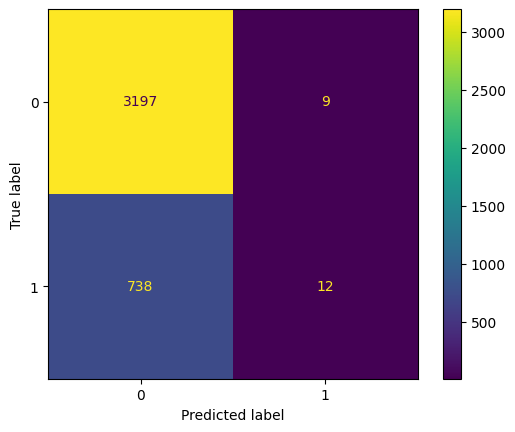

In [230]:
# Confusion Matrix display
cm = confusion_matrix(y_test_rf, y_preds_discrete, labels=knn.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=knn.classes_).plot()

# Creating assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test_rf == 1, y_pred > 0.5).ravel()
tn_svc = tn
fp_svc = fp
fn_svc = fn
tp_svc = tp

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Precision is:",tp/(tp+fp))
print("Recall is:",tp/(tp+fn))
print("F1 score is:",(2*precision*recall)/(precision+recall))

0.5065963817841547


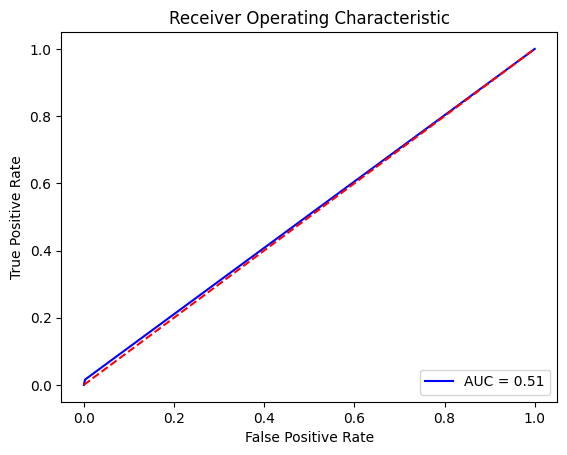

In [231]:
auc_roc_plot(y_test_rf, y_pred)